# Contrôle synthétique
# 15 juillet 2021
# @author : jeremylhour

Avant : lancer le script "synth_setup.sh" qui permet de télécharger les données de consommation de tabac aux US, et les placer à la racine dans data/MLAB_data.txt

In [1]:
rm(list=ls())

packageList = c('Synth')
for(pack in packageList) install.packages(pack)
lapply(packageList, require, character.only = TRUE)


In [12]:
print(paste(rep("=", 80), collapse=""))
print("MISE EN FORME DES DONNEES")
print(paste(rep("=", 80), collapse=""))

DATA_PATH = '../data/MLAB_data.txt'

data = data.frame(t(read.table(DATA_PATH)))

smokeNames = mapply(function(x) paste("SmokingCons", x, sep=""), 1970:2000) # noms de variables pour la conso de tabac
names = c("State_ID",
          "Income",
          "RetailPrice",
          "Young",
          "BeerCons",
          "Smoking1988",
          "Smoking1980",
          "Smoking1975",
           smokeNames)
colnames(data) = names

stateNames = c('Alabama', 'Arkansas','Colorado','Connecticut','Delaware',
               'Georgia',  'Idaho',  'Illinois',  'Indiana', 'Iowa', 'Kansas',
               'Kentucky', 'Louisiana', 'Maine', 'Minnesota', 'Mississippi',
               'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
               'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
               'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
               'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia' , 'West Virginia',
               'Wisconsin', 'Wyoming', 'California')
rownames(data) = stateNames
data[, "Treated"] = as.numeric(data[,"State_ID"]==3) # la Californie est l'Etat avec ID=3
                  
head(data)

[1] "================================================================================"
[1] "MISE EN FORME DES DONNEES"
[1] "================================================================================"


,State_ID,Income,RetailPrice,Young,BeerCons,Smoking1988,Smoking1980,Smoking1975,SmokingCons1970,SmokingCons1971,⋯,SmokingCons1992,SmokingCons1993,SmokingCons1994,SmokingCons1995,SmokingCons1996,SmokingCons1997,SmokingCons1998,SmokingCons1999,SmokingCons2000,Treated
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,1,9.678974,89.34445,0.1748019,18.96,112.1,123.2,111.7,89.8,95.4,⋯,109.1,108.5,107.1,102.6,101.4,104.9,106.2,100.7,96.2,0
Arkansas,2,9.643623,89.87778,0.1646114,18.52,121.5,131.8,114.8,100.3,104.1,⋯,126.0,113.8,108.8,113.0,110.7,108.7,109.5,104.8,99.4,0
Colorado,4,9.984357,82.62222,0.1737032,25.08,94.6,131.0,131.0,124.8,125.5,⋯,88.3,88.6,89.1,85.4,83.1,81.3,81.2,79.6,73.0,0
Connecticut,5,10.188035,103.47778,0.1636597,20.70,104.8,118.0,110.2,120.0,117.6,⋯,83.5,79.1,76.6,79.3,76.0,75.9,75.5,73.4,71.4,0
Delaware,6,9.974561,90.05556,0.1782245,26.08,137.1,150.5,147.6,155.0,161.1,⋯,120.0,123.8,126.1,127.2,128.3,124.1,132.8,139.5,140.7,0
Georgia,7,9.817172,84.36667,0.1769441,21.76,124.1,134.0,122.9,109.9,115.7,⋯,109.2,109.2,107.8,100.3,102.7,100.6,100.5,97.1,88.4,0


[1] "================================================================================"
[1] "REPRODUCTION DE LA FIGURE 1"
[1] "================================================================================"


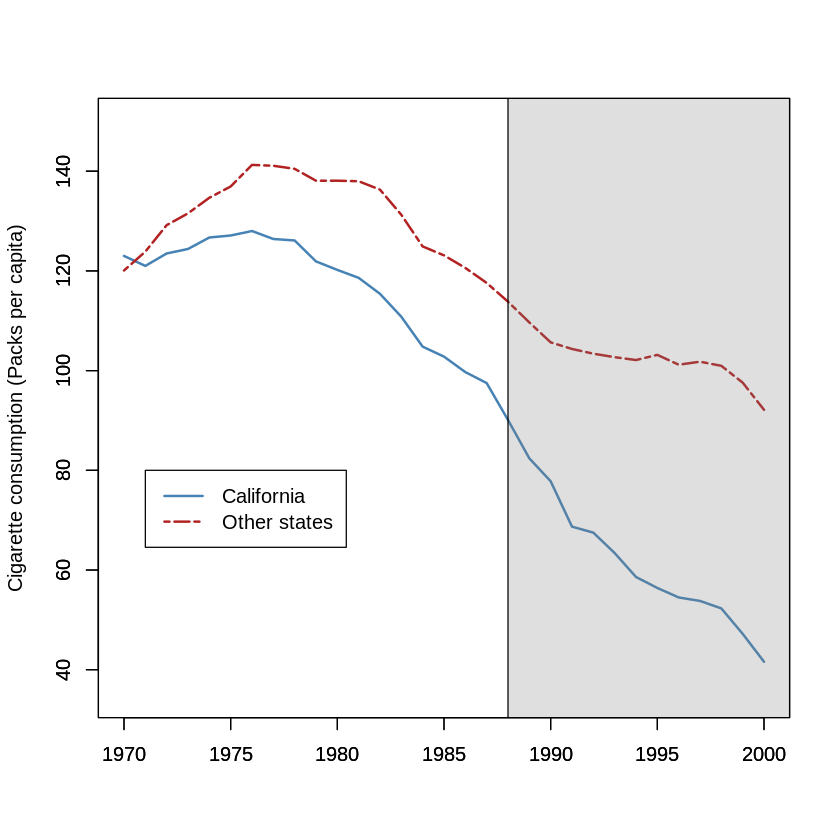

In [16]:
print(paste(rep("=", 80), collapse=""))
print("REPRODUCTION DE LA FIGURE 1")
print(paste(rep("=", 80), collapse=""))

plotdata = ts(cbind(unlist(data[data[,"Treated"]==1, smokeNames]),
                    unlist(apply(data[data[,"Treated"]==0, smokeNames], 2, mean))),start=c(1970), freq=1)


plot(plotdata, plot.type="single",
     col=c("steelblue","firebrick"), lwd=2,
     lty=c(1, 6),xlab="", ylab="Cigarette consumption (Packs per capita)",
     ylim=c(35,150))
lim <- par("usr")
rect(1988, lim[3], lim[2], lim[4], col = rgb(0.5,0.5,0.5,1/4))
axis(1) ## add axes back
axis(2)
box() 
legend(1971,80,
       legend=c("California", "Other states"),
       col=c("steelblue","firebrick"), lwd=2,
       lty=c(1,6))

On peut constater que la consommation de cigarettes par tête en Californie est bien inférieure à la moyenne des autres Etats, et tend à diminue plus rapidement. Il n'y a clairement pas de tendance commune.

In [52]:
print(paste(rep("=", 80), collapse=""))
print("CALCUL DES POIDS")
print(paste(rep("=", 80), collapse=""))

X1 = t(data[data[,"Treated"]==1, c("Income", "RetailPrice", "Young", "BeerCons", "Smoking1988","Smoking1980","Smoking1975")])
X0 = t(data[data[,"Treated"]==0, c("Income", "RetailPrice", "Young", "BeerCons", "Smoking1988","Smoking1980","Smoking1975")])

Z1 = t(data[data[,"Treated"]==1, mapply(function(x) paste("SmokingCons", x, sep=""), 1970:1988)])
Z0 = t(data[data[,"Treated"]==0, mapply(function(x) paste("SmokingCons", x, sep=""), 1970:1988)])

solution = synth(X1=X1,
                 X0=X0,
                 Z0=Z0,
                 Z1=Z1,
                 custom.v = NULL,
                 optimxmethod = "Nelder-Mead",
                 genoud = FALSE,
                 quadopt = "ipop",
                 Margin.ipop = 5e-04,
                 Sigf.ipop = 5,
                 Bound.ipop = 10,
                 verbose = TRUE)       

                                        
print(paste(rep("=", 80), collapse=""))
print("AFFICHAGE DES POIDS DE CHAQUE ETAT")
print(paste(rep("=", 80), collapse=""))
                                        
W = solution$solution.w
print(round(W, 3))

[1] "================================================================================"
[1] "CALCUL DES POIDS"
[1] "================================================================================"
X1,X0,Z1,Z0 were individually input (not dataprep object.)


**************** 
 searching for synthetic control unit  
 
                      p1        p2        p3          p4        p5          p6
Nelder-Mead -0.002084832 0.1394833 0.3560638 -0.01424623 0.2791152 -0.02033223
                   p7    value fevals gevals niter convcode kkt1 kkt2  xtime
Nelder-Mead 0.1714994 4.412518    502     NA    NA        1   NA   NA 25.436
                      p1         p2           p3          p4         p5
Nelder-Mead 0.0006542238 0.03495713 -0.003775559 -0.01394098 0.07644841
                   p6       p7    value fevals gevals niter convcode kkt1 kkt2
Nelder-Mead 0.4392839 0.552291 3.209078    502     NA    NA        1   NA   NA
             xtime
Nelder-Mead 33.009

 Equal weight loss is: 4.4125

On peut constater qu'aux erreurs numériques près, on reproduit bien les résultats d'Abadie et al. (2010).

In [57]:
print(paste(rep("=", 80), collapse=""))
print("TABLEAU DE DISTANCE D'APPARIEMMENT")
print(paste(rep("=", 80), collapse=""))

tableau1 = round(cbind(X1, X0%*%W ,apply(X0, 1, mean)), 1)
colnames(tableau1) = c("Real California", "Synthetic California", "Average of 38 Control States")
print(tableau1)

[1] "================================================================================"
[1] "TABLEAU DE DISTANCE D'APPARIEMMENT"
[1] "================================================================================"
            Real California Synthetic California Average of 38 Control States
Income                 10.1                  9.9                          9.8
RetailPrice            89.4                 89.3                         87.3
Young                   0.2                  0.2                          0.2
BeerCons               24.3                 24.1                         23.7
Smoking1988            90.1                 91.4                        113.8
Smoking1980           120.2                120.2                        138.1
Smoking1975           127.1                126.9                        136.9


On reproduit également les résultats de la Table 1. On constate que la Californie synthétique offre un bien meilleur contrefactuel que la moyenne simple des autres Etats.

[1] "================================================================================"
[1] "REPRODUCTION DES FIGURES 2 ET 3"
[1] "================================================================================"


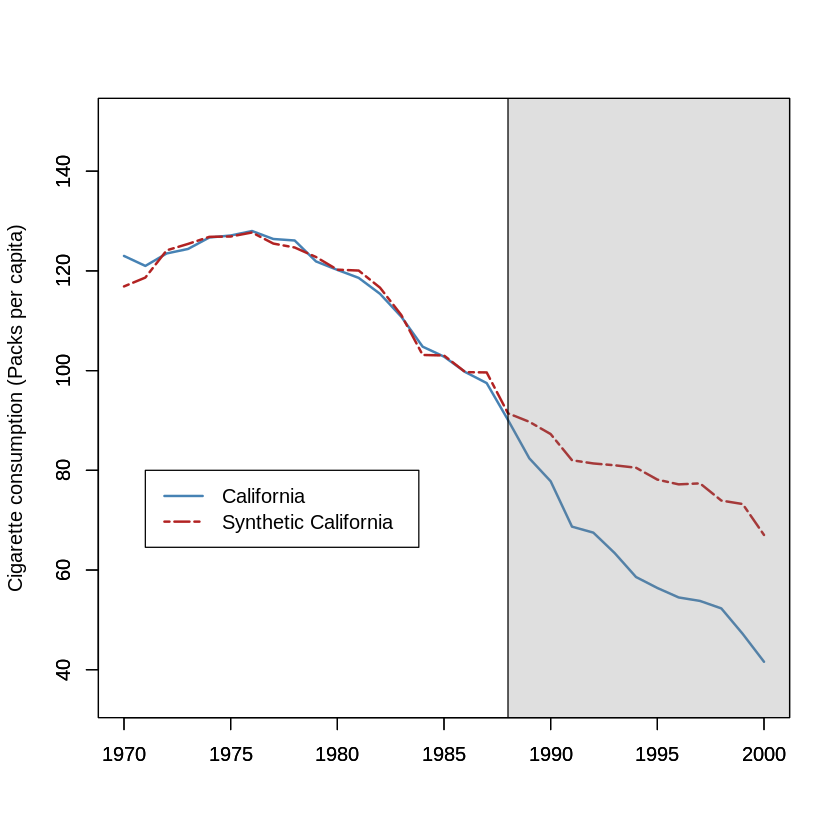

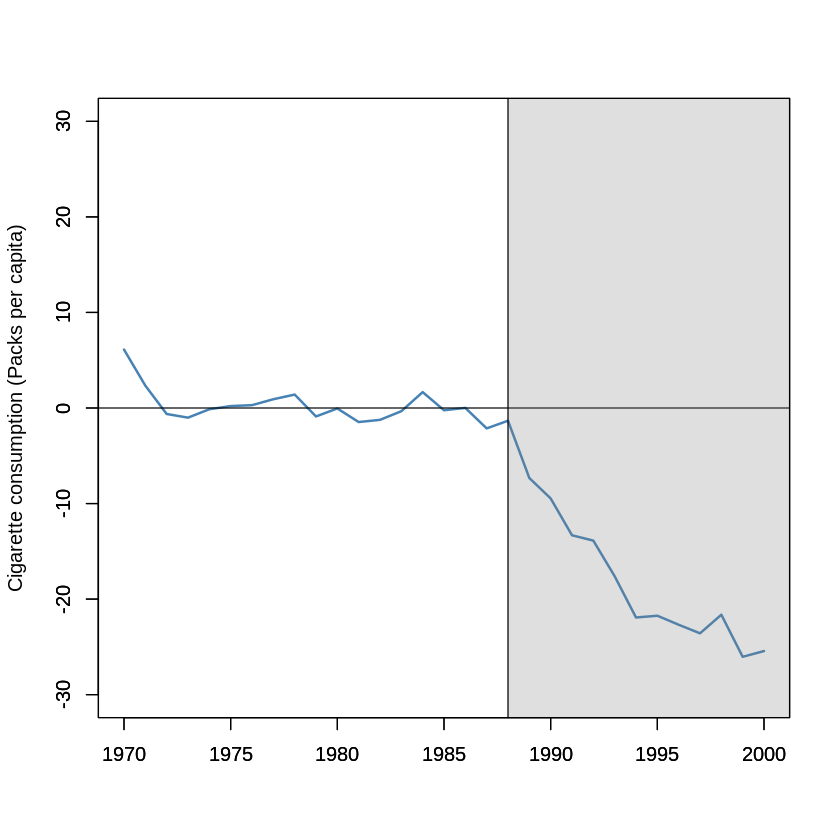

In [72]:
print(paste(rep("=", 80), collapse=""))
print("REPRODUCTION DES FIGURES 2 ET 3")
print(paste(rep("=", 80), collapse=""))

# FIG 2
plotdata = ts(cbind(unlist(data[data[,"Treated"]==1, smokeNames]),
                    unlist(t(as.matrix(data[data[,"Treated"]==0, smokeNames]))%*%W)),start=c(1970), freq=1)


plot(plotdata, plot.type="single",
     col=c("steelblue","firebrick"), lwd=2,
     lty=c(1, 6),xlab="", ylab="Cigarette consumption (Packs per capita)",
     ylim=c(35,150))
lim <- par("usr")
rect(1988, lim[3], lim[2], lim[4], col = rgb(0.5,0.5,0.5,1/4))
axis(1) ## add axes back
axis(2)
box() 
legend(1971,80,
       legend=c("California", "Synthetic California"),
       col=c("steelblue","firebrick"), lwd=2,
       lty=c(1,6))

# FIG 3
treatmentPlot = ts(unlist(data[data[,"Treated"]==1, smokeNames] - t(as.matrix(data[data[,"Treated"]==0, smokeNames]))%*%W),start=c(1970), freq=1)

plot(treatmentPlot, plot.type="single",
     col=c("steelblue"), lwd=2,
     lty=c(1),xlab="", ylab="Cigarette consumption (Packs per capita)",
     ylim=c(-30,30))
abline(h=0, lty=c(1))
lim <- par("usr")
rect(1988, lim[3], lim[2], lim[4], col = rgb(0.5,0.5,0.5,1/4))
axis(1) ## add axes back
axis(2)
box() 
legend(1971,80,
       legend=c("Treatment Effect"),
       col=c("steelblue"), lwd=2,
       lty=c(1,6))